###import libraries

In [328]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

###load data

In [329]:
response = requests.get('https://www.ncei.noaa.gov/data/global-marine/doc/Marine_CSV_sample.csv')

In [330]:
csv_data = io.StringIO(response.text)

In [331]:
df = pd.read_csv(csv_data)

###EDA

In [332]:
df.size

1815

In [333]:
df.shape

(55, 33)

In [334]:
df.columns

Index(['Identification', 'Latitude', 'Longitude', 'Time of Observation',
       'Ice Accretion On Ship', 'Thickness of Ice Accretion On Ship',
       'Rate of Ice Accretion on Ship', 'Sea Level Pressure',
       'Characteristics of Pressure Tendency', 'Pressure Tendency',
       'Air Temperature', 'Wet Bulb Temperature', 'Dew Point Temperature',
       'Sea Surface Temperature', 'Wave Direction', 'Wave Period',
       'Wave Height', 'Swell Direction', 'Swell Period', 'Swell Height',
       'Total Cloud Amount', 'Low Cloud Amount', 'Low Cloud Type',
       'Cloud Height Indicator', 'Cloud Height', 'Middle Cloud Type',
       'High Cloud Type', 'Visibility', 'Visibility Indicator',
       'Present Weather', 'Past Weather', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [335]:
df.head()

,Identification,Latitude,Longitude,Time of Observation,Ice Accretion On Ship,Thickness of Ice Accretion On Ship,Rate of Ice Accretion on Ship,Sea Level Pressure,Characteristics of Pressure Tendency,Pressure Tendency,Air Temperature,Wet Bulb Temperature,Dew Point Temperature,Sea Surface Temperature,Wave Direction,Wave Period,Wave Height,Swell Direction,Swell Period,Swell Height,Total Cloud Amount,Low Cloud Amount,Low Cloud Type,Cloud Height Indicator,Cloud Height,Middle Cloud Type,High Cloud Type,Visibility,Visibility Indicator,Present Weather,Past Weather,Wind Direction,Wind Speed
0,D5GN6,-35.8,2.9,2015-01-12T00:00:00,,,,29.83,8,0.0,70.5,,65.5,,,,,,,,7,,,,5,,,97,,3,2,300,139
1,D5GN6,-35.9,6.9,2015-01-12T12:00:00,,,,29.93,1,0.0,66.2,,56.1,,,9,10,,,,8,,,,2,1,A,97,,2,2,180,165
2,D5GN6,-35.9,8.6,2015-01-12T18:00:00,,,,30.02,1,0.0,61.2,,48.9,,,7,7,24,12,8,8,,,,2,0,0,97,,2,2,170,154
3,D5GN6,-35.7,11.9,2015-01-13T06:00:00,,,,30.14,0,0.0,64.6,,45.0,,,8,7,22,9,8,7,,,,3,0,0,98,,1,2,140,118
4,D5GN6,-35.6,13.7,2015-01-13T12:00:00,,,,30.12,8,,66.7,,50.5,,,8,7,,,,4,,,,5,7,A,98,,2,1,160,123


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Identification                        55 non-null     object 
 1   Latitude                              55 non-null     float64
 2   Longitude                             55 non-null     float64
 3   Time of Observation                   55 non-null     object 
 4   Ice Accretion On Ship                 55 non-null     object 
 5   Thickness of Ice Accretion On Ship    55 non-null     object 
 6   Rate of Ice Accretion on Ship         55 non-null     object 
 7   Sea Level Pressure                    55 non-null     object 
 8   Characteristics of Pressure Tendency  55 non-null     object 
 9   Pressure Tendency                     55 non-null     object 
 10  Air Temperature                       55 non-null     object 
 11  Wet Bulb Temperature 

In [337]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Latitude,55.0,-20.558182,13.168181,-35.9,-32.3,-23.9,-11.20,6.1
Longitude,55.0,51.829091,27.141806,2.9,29.0,51.2,75.95,94.6
Visibility,55.0,97.527273,0.503857,97.0,97.0,98.0,98.00,98.0
Wind Direction,55.0,161.127273,99.436757,20.0,90.0,140.0,215.00,362.0
Wind Speed,55.0,108.345455,69.483336,10.0,69.5,108.0,139.00,463.0


In [338]:
df.describe(exclude='number').T

,count,unique,top,freq
Identification,55,1,D5GN6,55
Time of Observation,55,55,2015-01-12T00:00:00,1
Ice Accretion On Ship,55,1,,55
Thickness of Ice Accretion On Ship,55,1,,55
Rate of Ice Accretion on Ship,55,1,,55
Sea Level Pressure,55,34,29.83,4
Characteristics of Pressure Tendency,55,9,8,11
Pressure Tendency,55,2,0.0,53
Air Temperature,55,38,75.2,5
Wet Bulb Temperature,55,1,,55


###space inputs handling

In [339]:
df.isnull().sum()

,0
Identification,0
Latitude,0
Longitude,0
Time of Observation,0
Ice Accretion On Ship,0
Thickness of Ice Accretion On Ship,0
Rate of Ice Accretion on Ship,0
Sea Level Pressure,0
Characteristics of Pressure Tendency,0
Pressure Tendency,0


In [340]:
df['Ice Accretion On Ship'] == ' '

,Ice Accretion On Ship
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [341]:
df.replace(' ', None, inplace=True)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Identification                        55 non-null     object 
 1   Latitude                              55 non-null     float64
 2   Longitude                             55 non-null     float64
 3   Time of Observation                   55 non-null     object 
 4   Ice Accretion On Ship                 0 non-null      object 
 5   Thickness of Ice Accretion On Ship    0 non-null      object 
 6   Rate of Ice Accretion on Ship         0 non-null      object 
 7   Sea Level Pressure                    54 non-null     object 
 8   Characteristics of Pressure Tendency  54 non-null     object 
 9   Pressure Tendency                     53 non-null     object 
 10  Air Temperature                       54 non-null     object 
 11  Wet Bulb Temperature 

In [343]:
for col in df.columns:
    if df[col].isnull().sum() == df.shape[0]:
      df = df.drop(col, axis=1)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Identification                        55 non-null     object 
 1   Latitude                              55 non-null     float64
 2   Longitude                             55 non-null     float64
 3   Time of Observation                   55 non-null     object 
 4   Sea Level Pressure                    54 non-null     object 
 5   Characteristics of Pressure Tendency  54 non-null     object 
 6   Pressure Tendency                     53 non-null     object 
 7   Air Temperature                       54 non-null     object 
 8   Dew Point Temperature                 54 non-null     object 
 9   Wave Period                           28 non-null     object 
 10  Wave Height                           28 non-null     object 
 11  Swell Direction      

###drop useless columns

In [345]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col}:{df[col].nunique()}')

Identification:1
Time of Observation:55
Sea Level Pressure:33
Characteristics of Pressure Tendency:8
Pressure Tendency:1
Air Temperature:37
Dew Point Temperature:40
Wave Period:9
Wave Height:11
Swell Direction:17
Swell Period:7
Swell Height:8
Total Cloud Amount:8
Low Cloud Amount:6
Cloud Height:7
Middle Cloud Type:8
High Cloud Type:6
Present Weather:9
Past Weather:4


In [346]:
for col in df.select_dtypes(include='object').columns:
  if df[col].nunique() == 1:
    df = df.drop(col, axis=1)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Latitude                              55 non-null     float64
 1   Longitude                             55 non-null     float64
 2   Time of Observation                   55 non-null     object 
 3   Sea Level Pressure                    54 non-null     object 
 4   Characteristics of Pressure Tendency  54 non-null     object 
 5   Air Temperature                       54 non-null     object 
 6   Dew Point Temperature                 54 non-null     object 
 7   Wave Period                           28 non-null     object 
 8   Wave Height                           28 non-null     object 
 9   Swell Direction                       22 non-null     object 
 10  Swell Period                          20 non-null     object 
 11  Swell Height         

In [348]:
df['Time of Observation']

,Time of Observation
0,2015-01-12T00:00:00
1,2015-01-12T12:00:00
2,2015-01-12T18:00:00
3,2015-01-13T06:00:00
4,2015-01-13T12:00:00
5,2015-01-13T18:00:00
6,2015-01-14T00:00:00
7,2015-01-14T06:00:00
8,2015-01-14T12:00:00
9,2015-01-14T18:00:00


In [349]:
df = df.drop('Time of Observation', axis=1)

###type casting

In [350]:
pd.set_option('display.max_columns', None)

In [351]:
df.head()

,Latitude,Longitude,Sea Level Pressure,Characteristics of Pressure Tendency,Air Temperature,Dew Point Temperature,Wave Period,Wave Height,Swell Direction,Swell Period,Swell Height,Total Cloud Amount,Low Cloud Amount,Cloud Height,Middle Cloud Type,High Cloud Type,Visibility,Present Weather,Past Weather,Wind Direction,Wind Speed
0,-35.8,2.9,29.83,8,70.5,65.5,None,None,None,None,None,7,None,5,None,None,97,3,2,300,139
1,-35.9,6.9,29.93,1,66.2,56.1,9,10,None,None,None,8,None,2,1,A,97,2,2,180,165
2,-35.9,8.6,30.02,1,61.2,48.9,7,7,24,12,8,8,None,2,0,0,97,2,2,170,154
3,-35.7,11.9,30.14,0,64.6,45.0,8,7,22,9,8,7,None,3,0,0,98,1,2,140,118
4,-35.6,13.7,30.12,8,66.7,50.5,8,7,None,None,None,4,None,5,7,A,98,2,1,160,123


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Latitude                              55 non-null     float64
 1   Longitude                             55 non-null     float64
 2   Sea Level Pressure                    54 non-null     object 
 3   Characteristics of Pressure Tendency  54 non-null     object 
 4   Air Temperature                       54 non-null     object 
 5   Dew Point Temperature                 54 non-null     object 
 6   Wave Period                           28 non-null     object 
 7   Wave Height                           28 non-null     object 
 8   Swell Direction                       22 non-null     object 
 9   Swell Period                          20 non-null     object 
 10  Swell Height                          23 non-null     object 
 11  Total Cloud Amount   

In [353]:
df['Low Cloud Amount']

,Low Cloud Amount
0,None
1,None
2,None
3,None
4,None
5,None
6,1
7,None
8,None
9,2


In [354]:
df[['Sea Level Pressure', 'Air Temperature', 'Dew Point Temperature']] = df[['Sea Level Pressure', 'Air Temperature', 'Dew Point Temperature']].astype('float64')

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Latitude                              55 non-null     float64
 1   Longitude                             55 non-null     float64
 2   Sea Level Pressure                    54 non-null     float64
 3   Characteristics of Pressure Tendency  54 non-null     object 
 4   Air Temperature                       54 non-null     float64
 5   Dew Point Temperature                 54 non-null     float64
 6   Wave Period                           28 non-null     object 
 7   Wave Height                           28 non-null     object 
 8   Swell Direction                       22 non-null     object 
 9   Swell Period                          20 non-null     object 
 10  Swell Height                          23 non-null     object 
 11  Total Cloud Amount   

In [356]:
df[['Middle Cloud Type' , 'High Cloud Type']]

,Middle Cloud Type,High Cloud Type
0,None,None
1,1,A
2,0,0
3,0,0
4,7,A
5,None,None
6,1,A
7,0,0
8,A,A
9,1,5


In [357]:
df[['Middle Cloud Type' , 'High Cloud Type']] = df[['Middle Cloud Type' , 'High Cloud Type']].replace('A', -1)

In [358]:
df[['Middle Cloud Type' , 'High Cloud Type']]

,Middle Cloud Type,High Cloud Type
0,None,None
1,1,-1
2,0,0
3,0,0
4,7,-1
5,None,None
6,1,-1
7,0,0
8,-1,-1
9,1,5


In [359]:
cat_cols = df.select_dtypes(include='object').columns
for cols in cat_cols:
  print(f'{cols}:{df[cols].unique()}')
  print('------------------------------------------------------------------------------------')

Characteristics of Pressure Tendency:['8' '1' '0' '5' '3' None '7' '2' '6']
------------------------------------------------------------------------------------
Wave Period:[None ' 9' ' 7' ' 8' ' 3' ' 6' ' 4' ' 5' '99' ' 0']
------------------------------------------------------------------------------------
Wave Height:[None '10' ' 7' '14' ' 6' ' 5' ' 2' ' 1' ' 3' ' 4' '63' ' 0']
------------------------------------------------------------------------------------
Swell Direction:[None '24' '22' '20' ' 9' ' 3' ' 7' '10' '18' '17' '38' '14' '28' '31'
 '26' '29' ' 1' ' 5']
------------------------------------------------------------------------------------
Swell Period:[None '12' ' 9' ' 8' ' 5' ' 7' ' 6' '10']
------------------------------------------------------------------------------------
Swell Height:[None ' 8' ' 7' ' 6' ' 5' ' 4' ' 3' ' 1' ' 2']
------------------------------------------------------------------------------------
Total Cloud Amount:['7' '8' '4' '6' '3' '2' None '1'

In [360]:
for col in cat_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Latitude                              55 non-null     float64
 1   Longitude                             55 non-null     float64
 2   Sea Level Pressure                    54 non-null     float64
 3   Characteristics of Pressure Tendency  54 non-null     Int64  
 4   Air Temperature                       54 non-null     float64
 5   Dew Point Temperature                 54 non-null     float64
 6   Wave Period                           28 non-null     Int64  
 7   Wave Height                           28 non-null     Int64  
 8   Swell Direction                       22 non-null     Int64  
 9   Swell Period                          20 non-null     Int64  
 10  Swell Height                          23 non-null     Int64  
 11  Total Cloud Amount   

###duplicate handling

In [362]:
df.duplicated().sum()

0

###null value handling

In [363]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Sea Level Pressure,1
Characteristics of Pressure Tendency,1
Air Temperature,1
Dew Point Temperature,1
Wave Period,27
Wave Height,27
Swell Direction,33
Swell Period,35


In [364]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
copy = knn_imputer.fit_transform(df)
df = pd.DataFrame(copy, columns=df.columns)

In [365]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Sea Level Pressure,0
Characteristics of Pressure Tendency,0
Air Temperature,0
Dew Point Temperature,0
Wave Period,0
Wave Height,0
Swell Direction,0
Swell Period,0


###outlier handling

In [366]:
def outlier_percentage(df):
  """Calculates the percentage of outliers in each column of a DataFrame.

  Args:
    df: A pandas DataFrame.

  Returns:
    A pandas Series containing the percentage of outliers in each column.
  """

  outlier_percentages = {}
  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
      outlier_percentage = (len(outliers) / len(df)) * 100
      outlier_percentages[column] = outlier_percentage

  return pd.Series(outlier_percentages)

In [367]:
outlier_percentage(df)

,0
Latitude,0.000000
Longitude,0.000000
Sea Level Pressure,3.636364
Characteristics of Pressure Tendency,0.000000
Air Temperature,1.818182
Dew Point Temperature,0.000000
Wave Period,16.363636
Wave Height,5.454545
Swell Direction,5.454545
Swell Period,9.090909


In [368]:
def cap_outliers(df):
  """Caps outliers in each numeric column of a DataFrame using IQR method.

  Args:
    df: A pandas DataFrame.

  Returns:
    A pandas DataFrame with outliers capped.
  """

  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df[column] = df[column].clip(lower_bound, upper_bound)

  return df


In [369]:
df = cap_outliers(df)

In [370]:
print(outlier_percentage(df))

Latitude                                0.0
Longitude                               0.0
Sea Level Pressure                      0.0
Characteristics of Pressure Tendency    0.0
Air Temperature                         0.0
Dew Point Temperature                   0.0
Wave Period                             0.0
Wave Height                             0.0
Swell Direction                         0.0
Swell Period                            0.0
Swell Height                            0.0
Total Cloud Amount                      0.0
Low Cloud Amount                        0.0
Cloud Height                            0.0
Middle Cloud Type                       0.0
High Cloud Type                         0.0
Visibility                              0.0
Present Weather                         0.0
Past Weather                            0.0
Wind Direction                          0.0
Wind Speed                              0.0
dtype: float64


###skewness handling

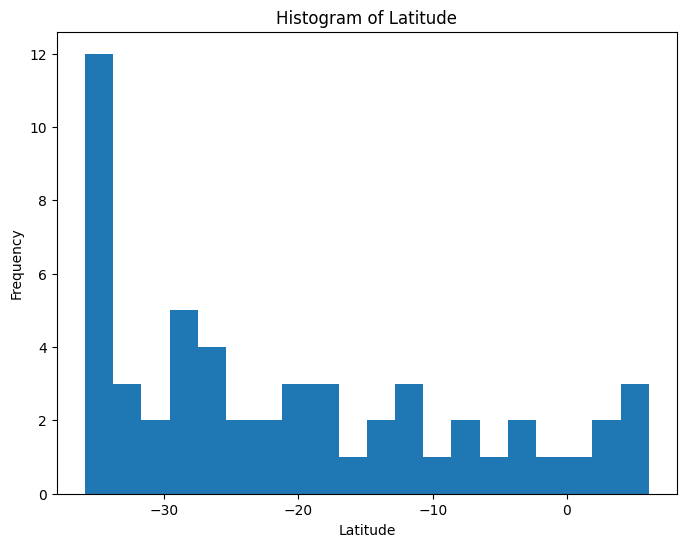

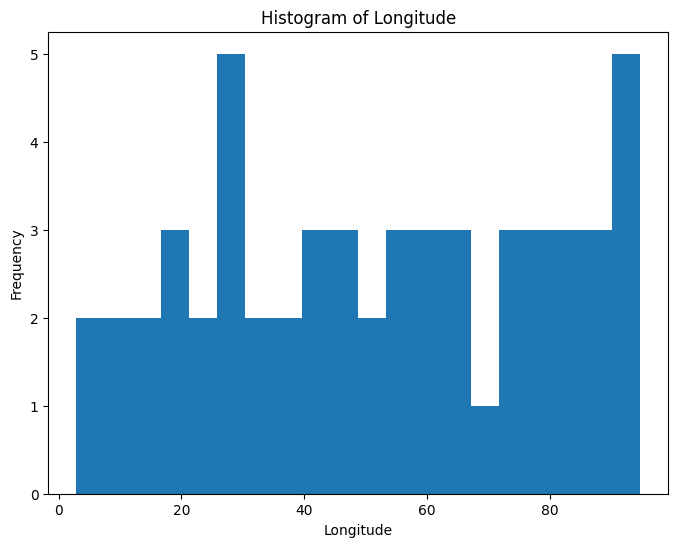

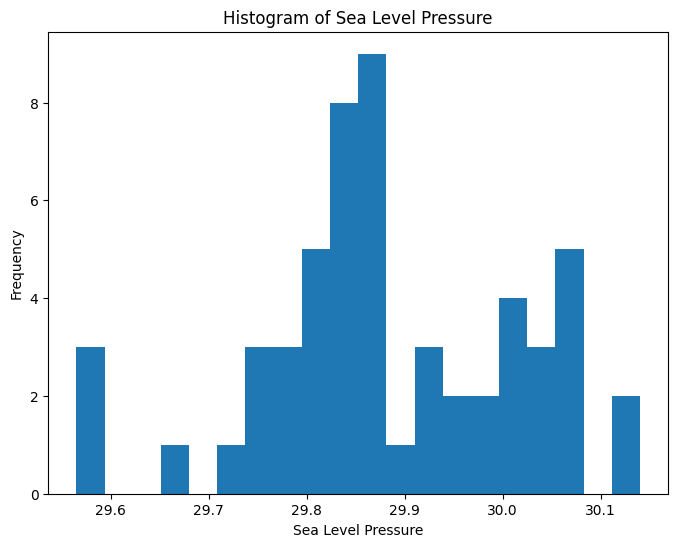

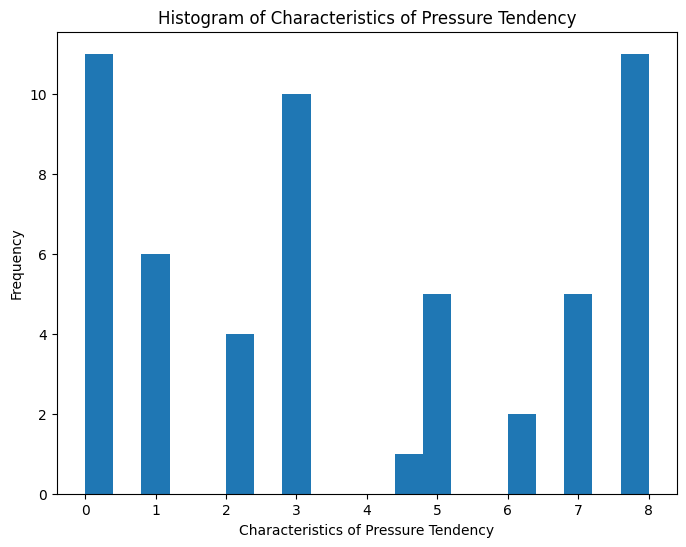

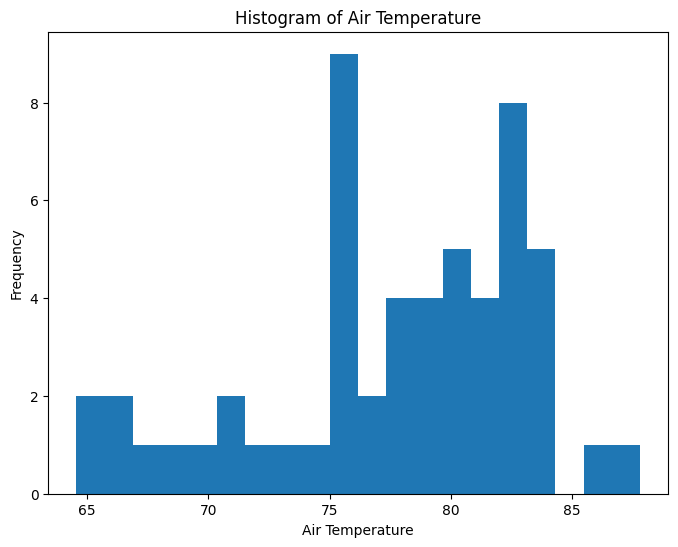

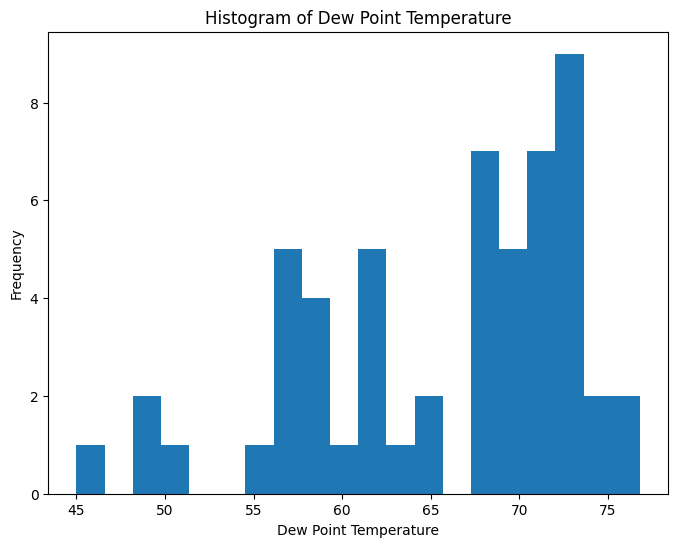

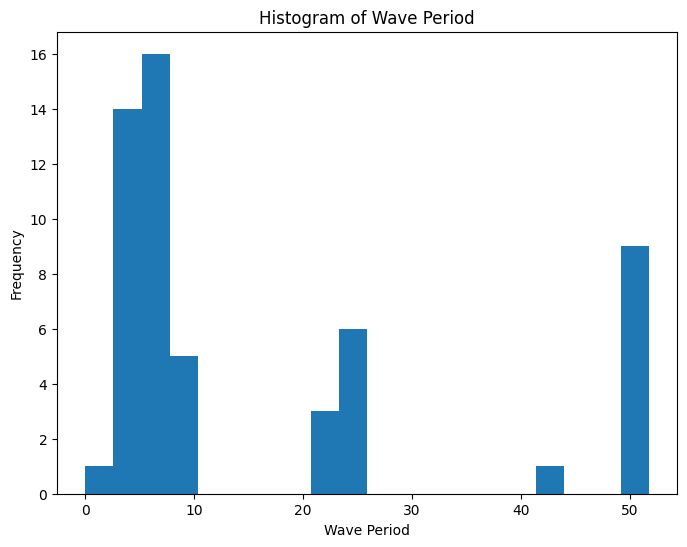

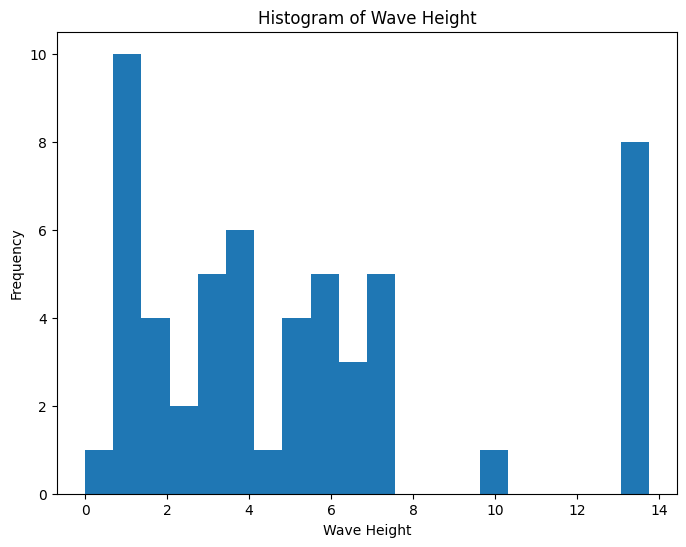

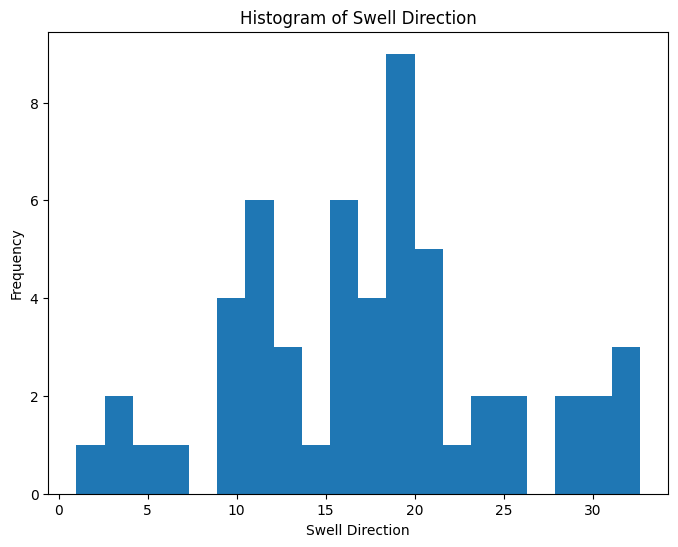

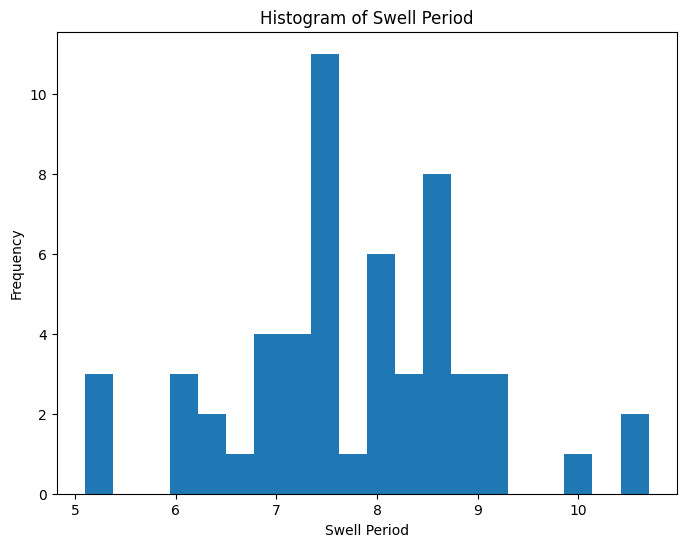

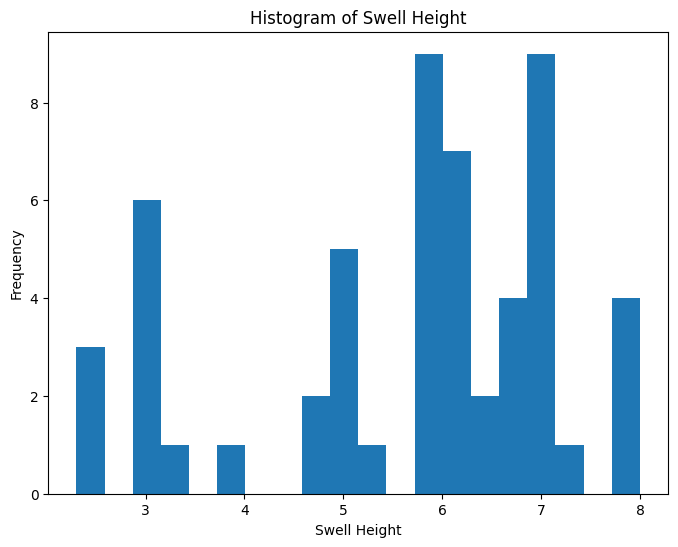

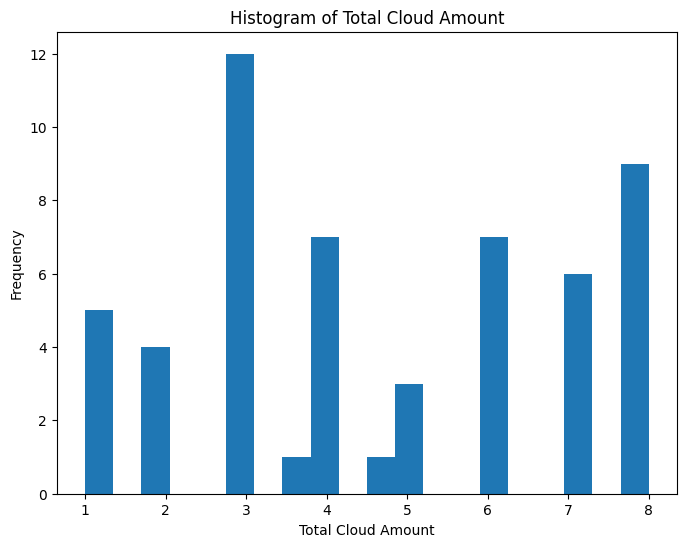

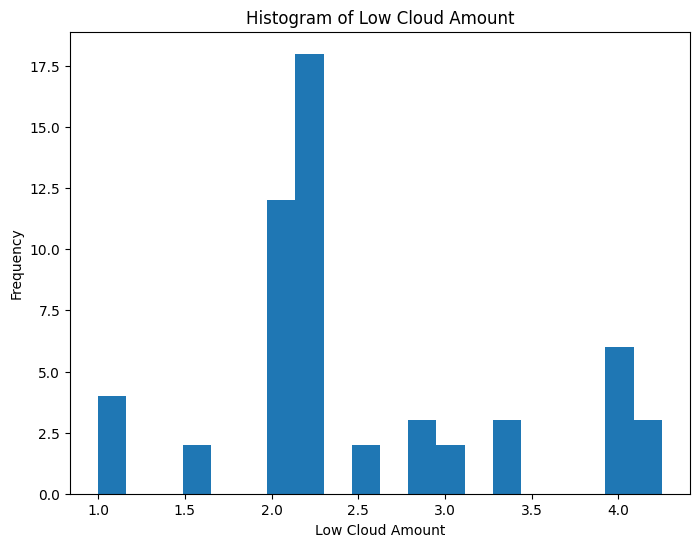

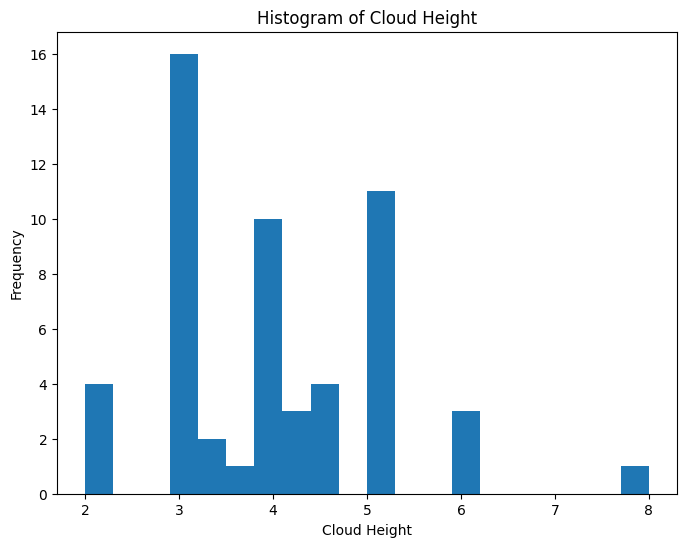

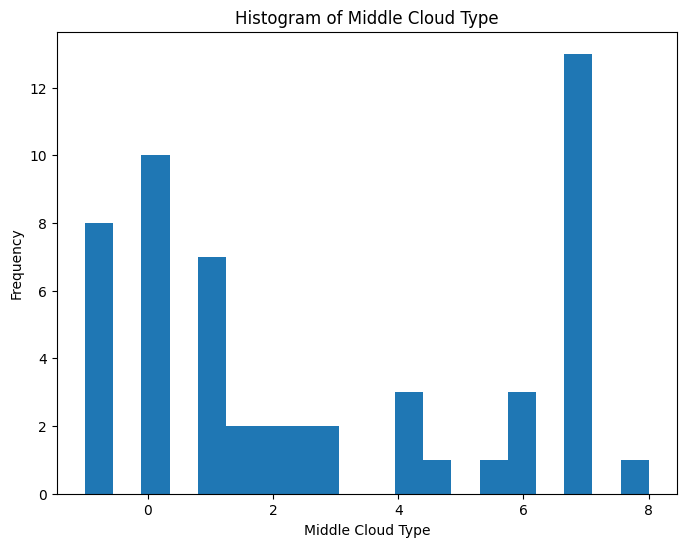

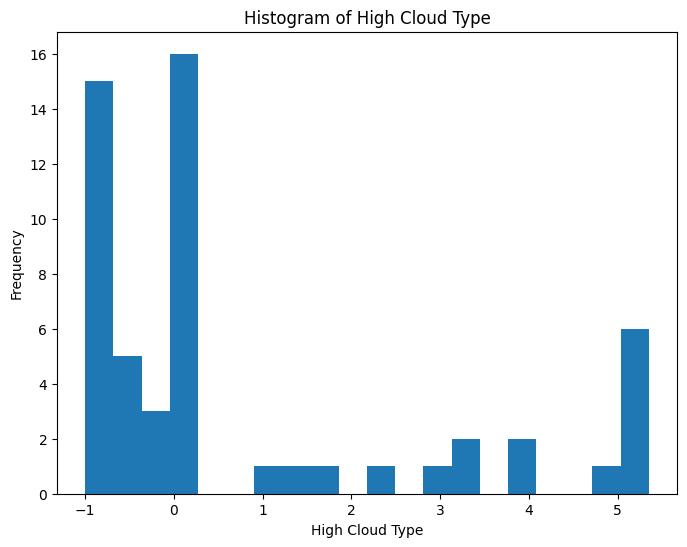

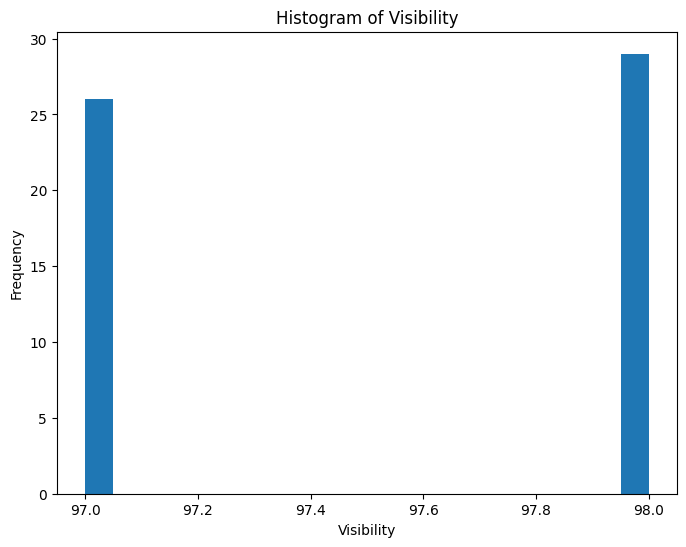

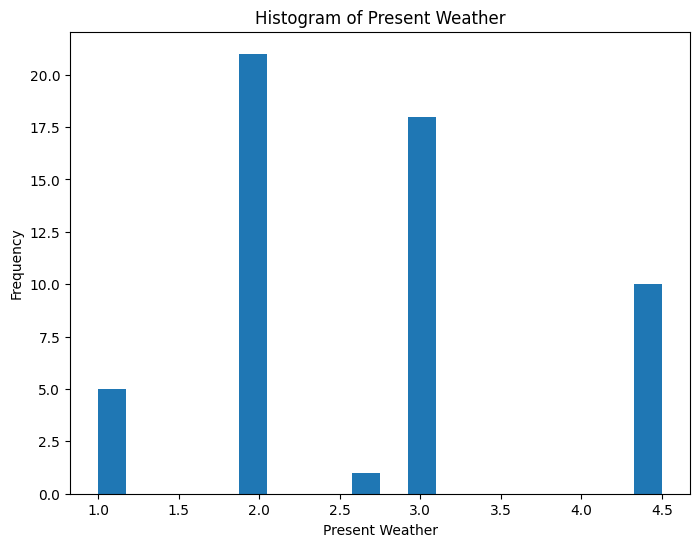

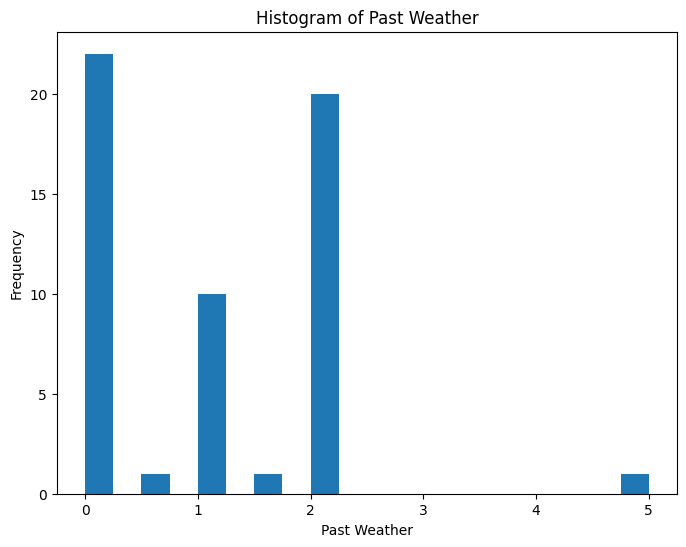

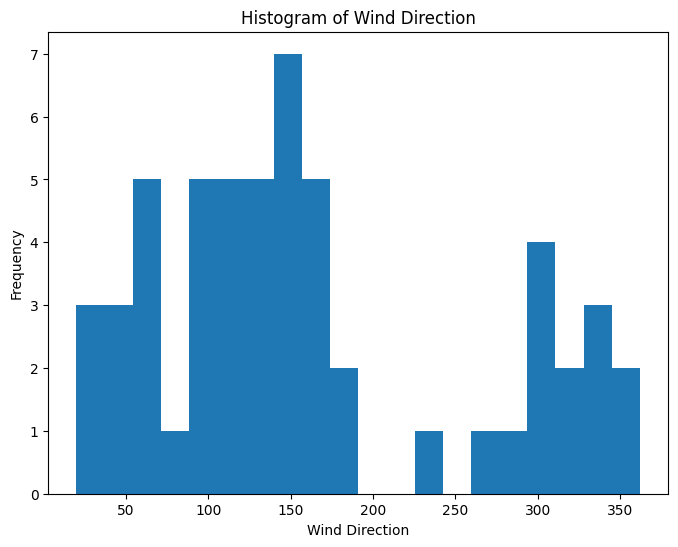

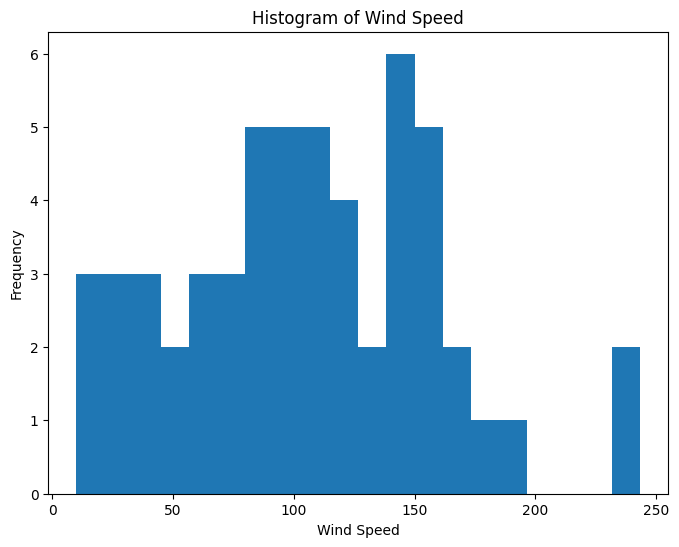

In [324]:
# Assuming df is your DataFrame
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [371]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    skewness = df[column].skew()
    print(f"Skewness percentage for {column}: {skewness * 100:.2f}%")

Skewness percentage for Latitude: 56.99%
Skewness percentage for Longitude: -2.90%
Skewness percentage for Sea Level Pressure: -27.93%
Skewness percentage for Characteristics of Pressure Tendency: 18.49%
Skewness percentage for Air Temperature: -70.51%
Skewness percentage for Dew Point Temperature: -79.07%
Skewness percentage for Wave Period: 122.93%
Skewness percentage for Wave Height: 99.74%
Skewness percentage for Swell Direction: 13.54%
Skewness percentage for Swell Period: -3.52%
Skewness percentage for Swell Height: -76.59%
Skewness percentage for Total Cloud Amount: 8.05%
Skewness percentage for Low Cloud Amount: 64.26%
Skewness percentage for Cloud Height: 73.18%
Skewness percentage for Middle Cloud Type: 29.99%
Skewness percentage for High Cloud Type: 123.33%
Skewness percentage for Visibility: -11.23%
Skewness percentage for Present Weather: 45.22%
Skewness percentage for Past Weather: 91.86%
Skewness percentage for Wind Direction: 67.91%
Skewness percentage for Wind Speed: 2

In [372]:
from sklearn.preprocessing import PowerTransformer

# Initialize the Yeo-Johnson transformer
yeo_johnson = PowerTransformer(method='yeo-johnson')

# Apply Yeo-Johnson transformation to the numeric columns
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column] = yeo_johnson.fit_transform(df[[column]])

In [373]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    skewness = df[column].skew()
    print(f"Skewness percentage for {column}: {skewness * 100:.2f}%")

Skewness percentage for Latitude: 57.23%
Skewness percentage for Longitude: -21.84%
Skewness percentage for Sea Level Pressure: -0.84%
Skewness percentage for Characteristics of Pressure Tendency: -17.54%
Skewness percentage for Air Temperature: -10.20%
Skewness percentage for Dew Point Temperature: -21.49%
Skewness percentage for Wave Period: 0.77%
Skewness percentage for Wave Height: -1.69%
Skewness percentage for Swell Direction: -4.75%
Skewness percentage for Swell Period: 1.21%
Skewness percentage for Swell Height: -22.04%
Skewness percentage for Total Cloud Amount: -11.23%
Skewness percentage for Low Cloud Amount: -0.00%
Skewness percentage for Cloud Height: -0.00%
Skewness percentage for Middle Cloud Type: -11.96%
Skewness percentage for High Cloud Type: 18.59%
Skewness percentage for Visibility: -11.23%
Skewness percentage for Present Weather: -1.06%
Skewness percentage for Past Weather: 0.15%
Skewness percentage for Wind Direction: -5.09%
Skewness percentage for Wind Speed: -1

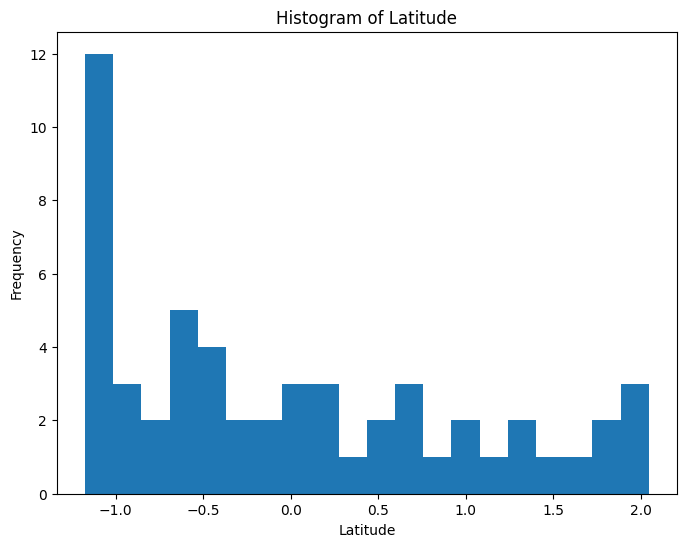

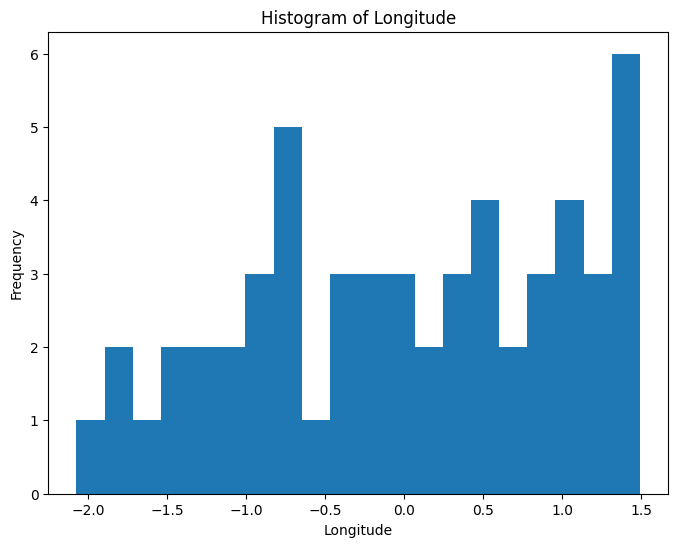

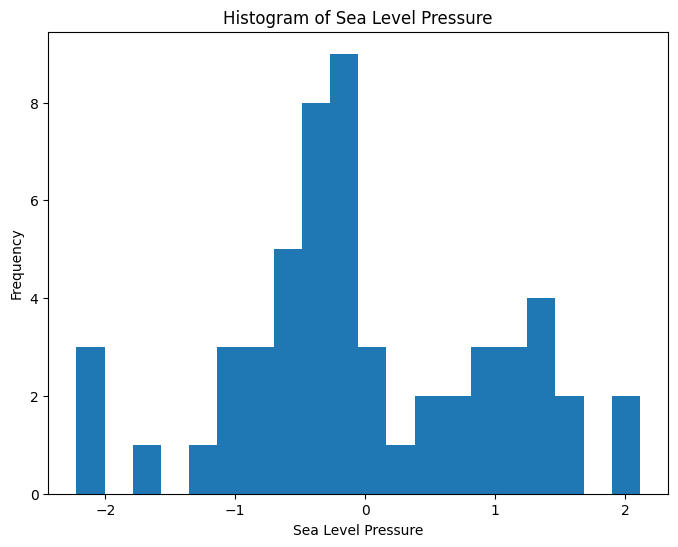

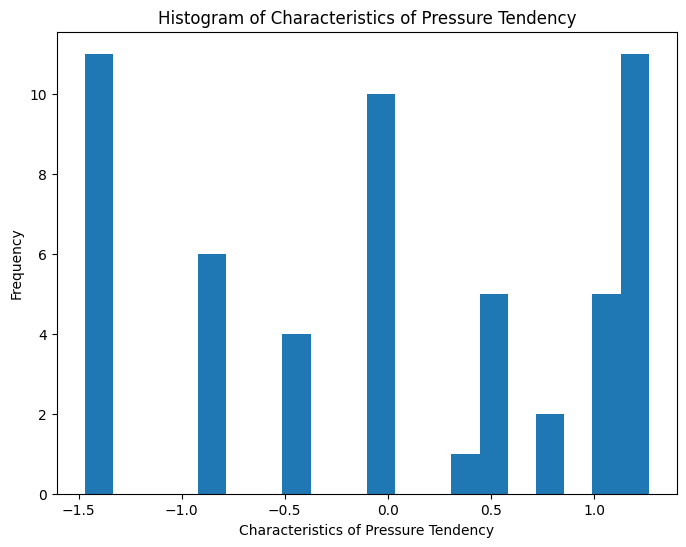

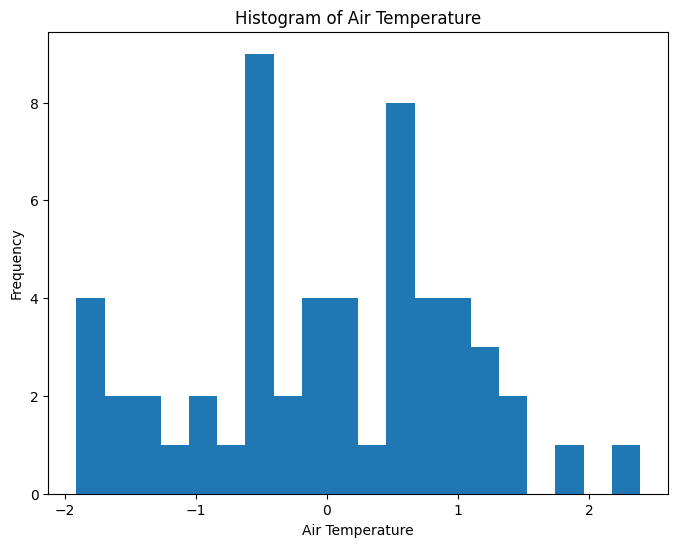

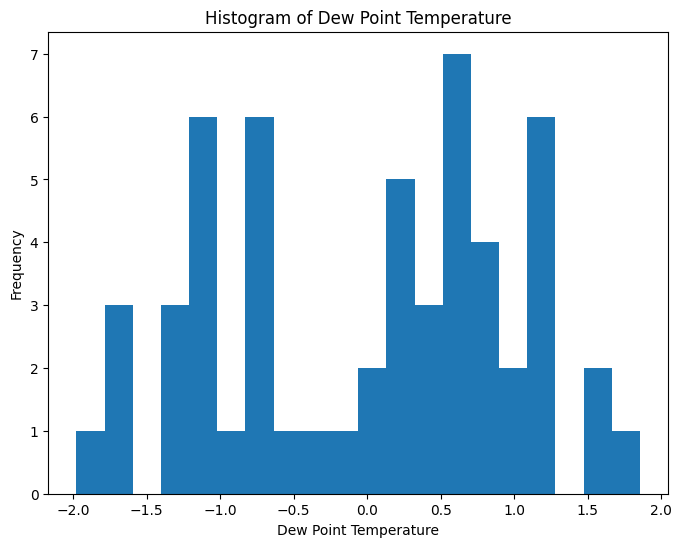

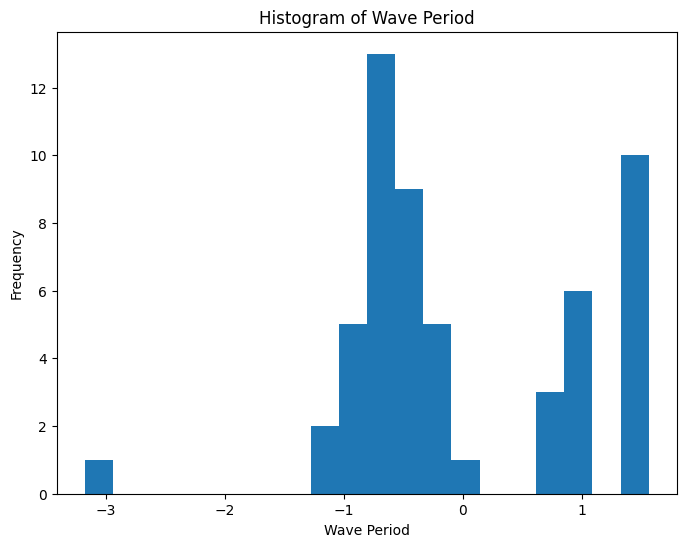

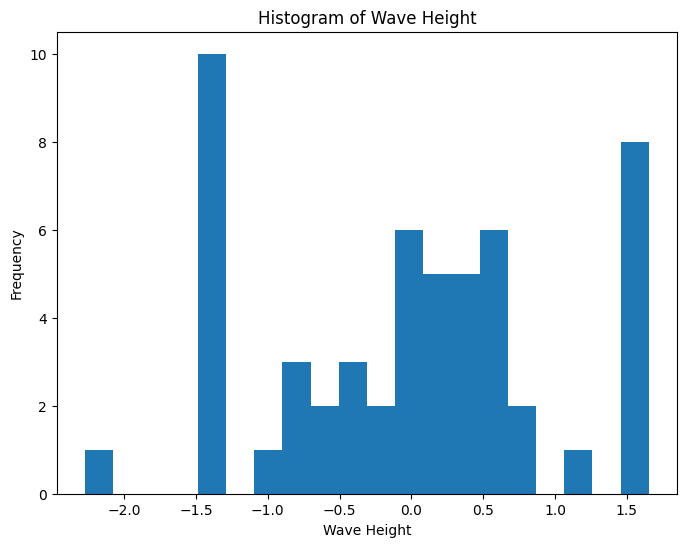

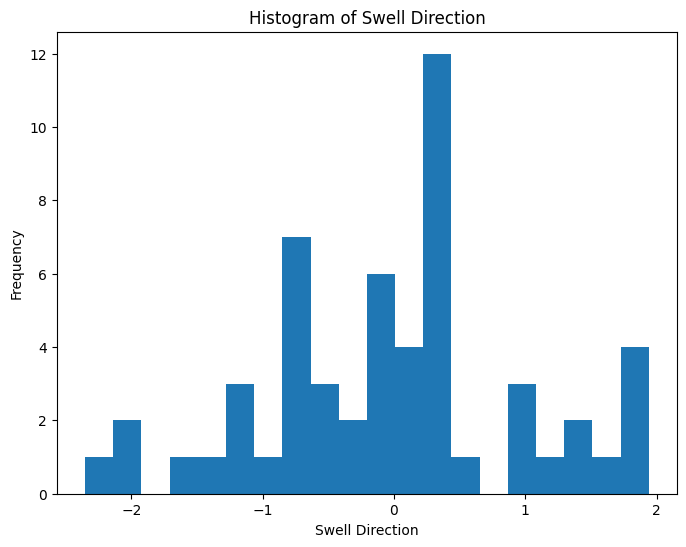

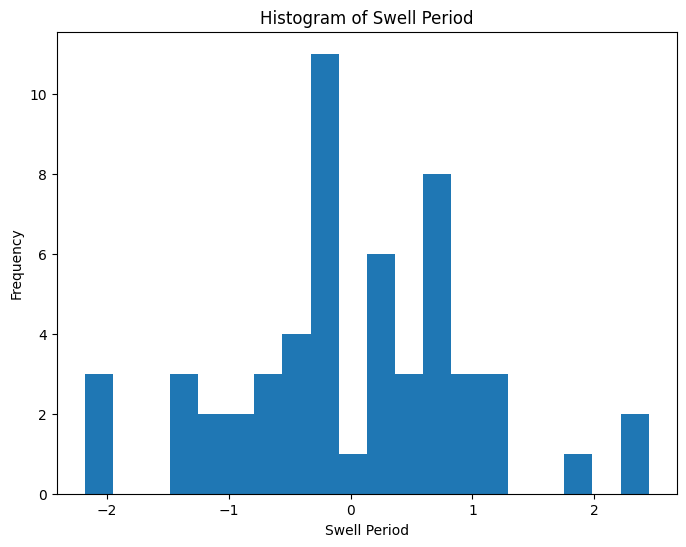

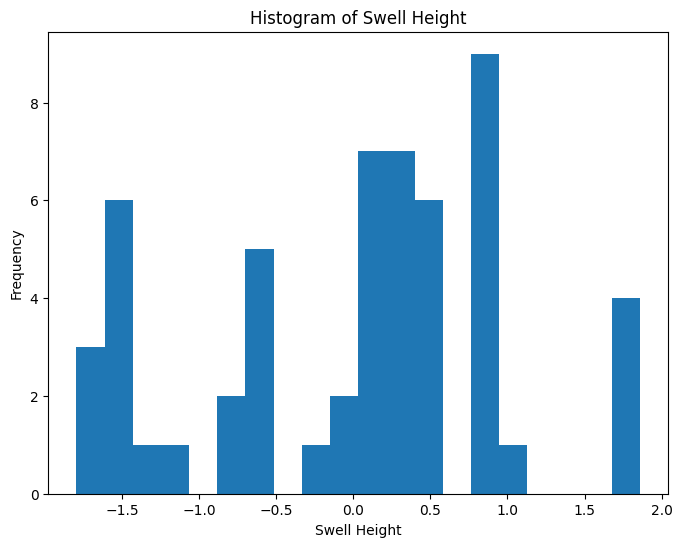

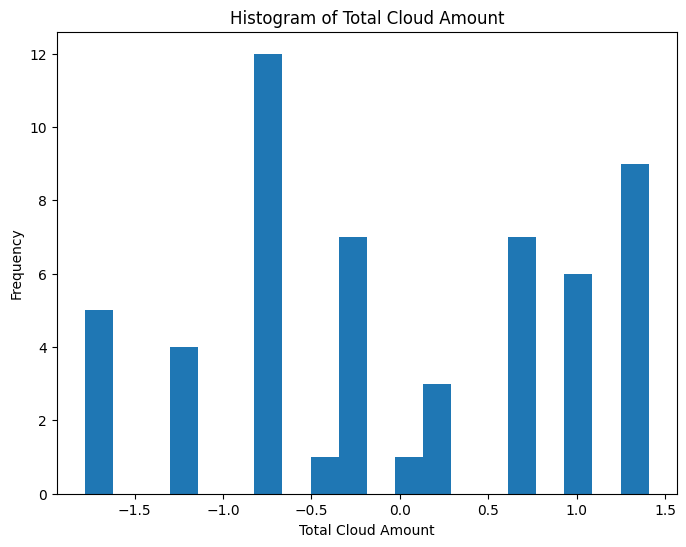

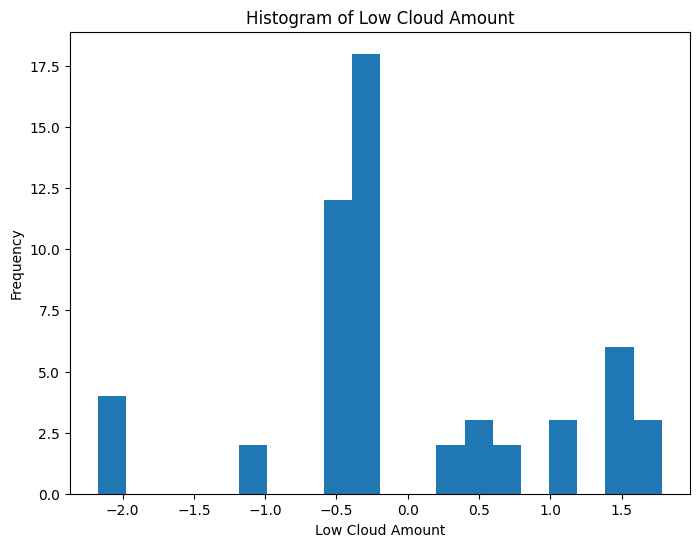

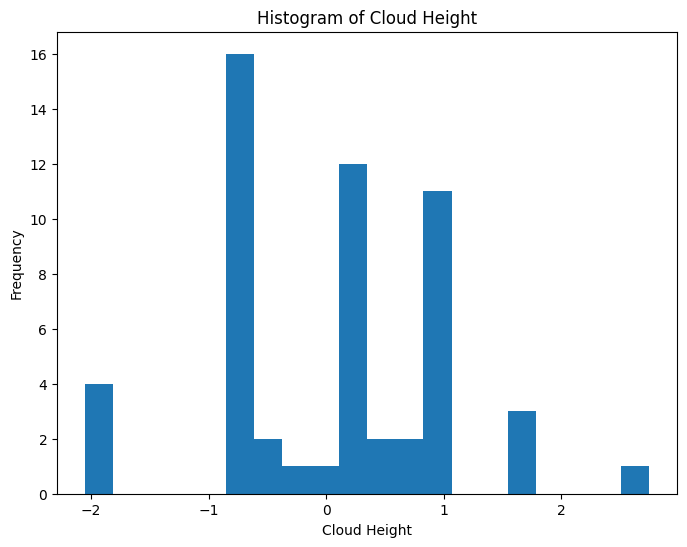

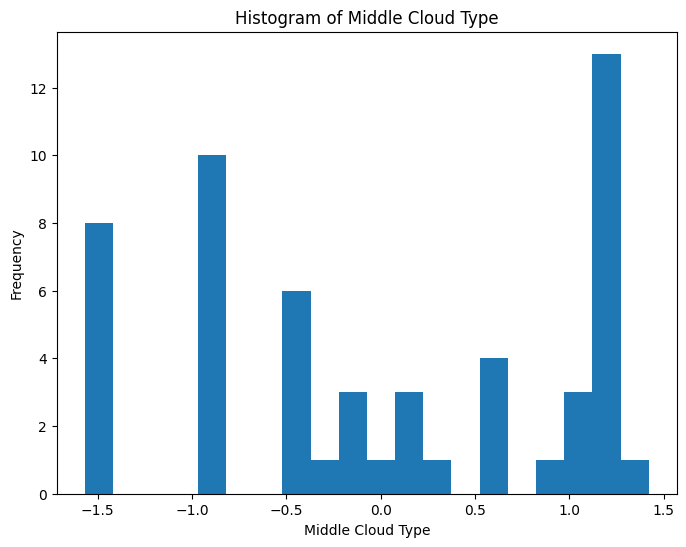

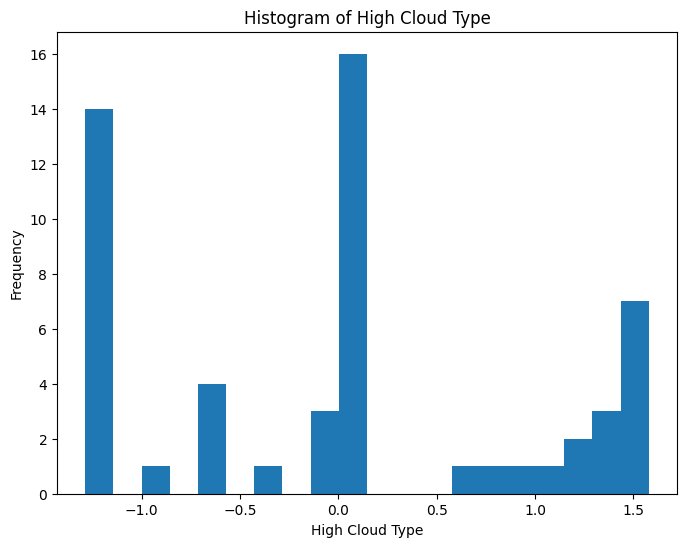

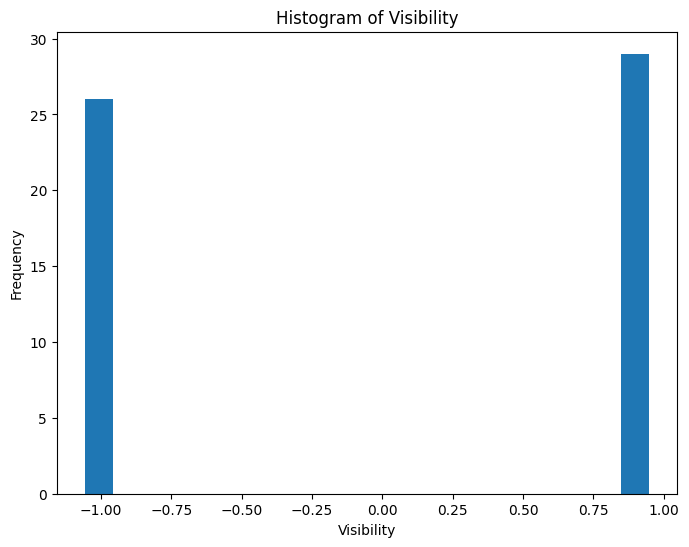

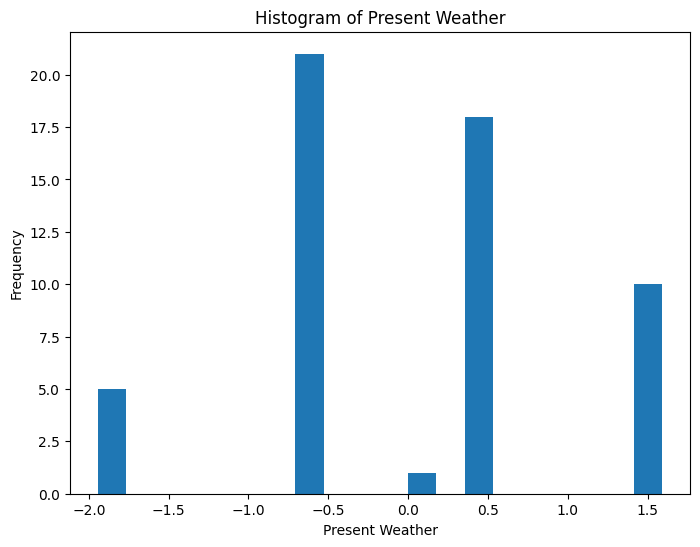

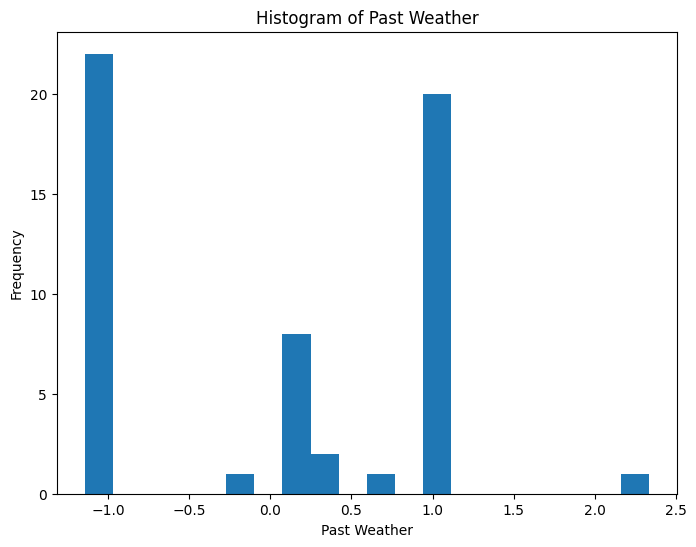

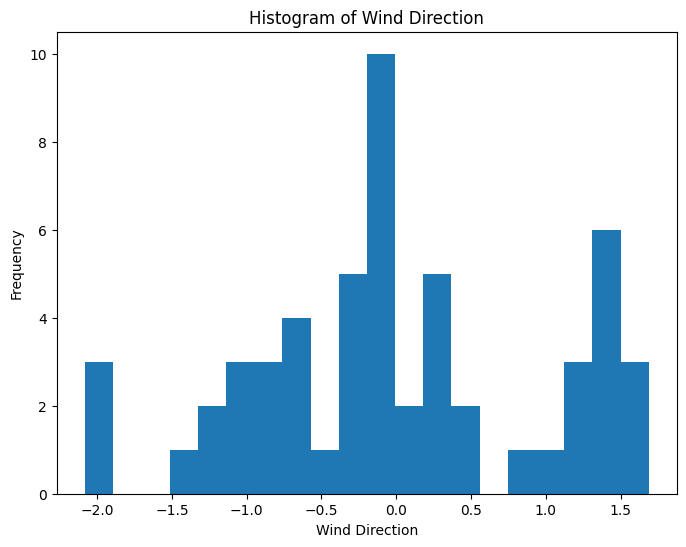

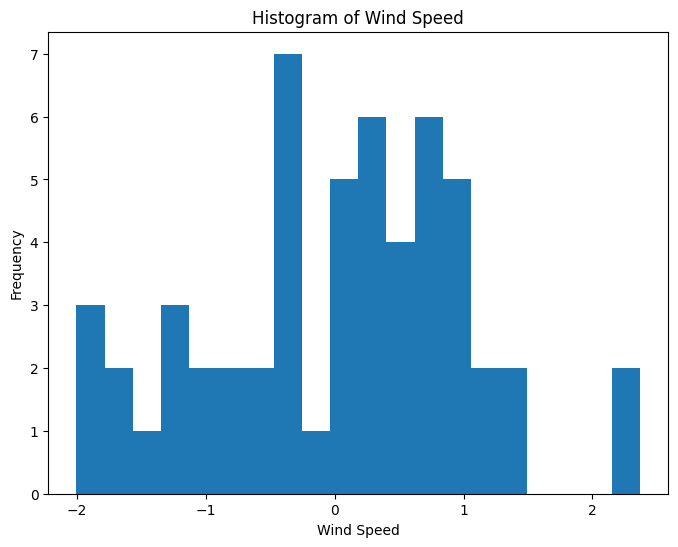

In [374]:
# Assuming df is your DataFrame
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

###scaling

In [377]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,55.0,-1.130409e-16,1.009217,-1.174969,-0.899539,-0.256661,0.716090,2.046267
Longitude,55.0,-4.037175e-18,1.009217,-2.074894,-0.803938,0.044904,0.894275,1.491481
Sea Level Pressure,55.0,-3.128810e-16,1.009217,-2.222450,-0.521574,-0.149031,0.803009,2.115692
Characteristics of Pressure Tendency,55.0,2.018587e-18,1.009217,-1.468132,-0.875461,-0.065707,1.040644,1.265407
Air Temperature,55.0,4.562007e-16,1.009217,-1.912807,-0.589875,0.073330,0.851800,2.389379
Dew Point Temperature,55.0,1.574498e-16,1.009217,-1.977382,-0.908073,0.183413,0.827242,1.856313
Wave Period,55.0,-6.863197e-16,1.009217,-3.171642,-0.650220,-0.466016,0.877633,1.561760
Wave Height,55.0,4.037175e-17,1.009217,-2.272240,-0.792545,-0.049041,0.607678,1.652352
Swell Direction,55.0,-8.054163e-16,1.009217,-2.353577,-0.709252,0.054857,0.392232,1.940695
Swell Period,55.0,-5.248327e-16,1.009217,-2.179335,-0.478464,-0.149321,0.679878,2.447606


In [379]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numeric columns
copy = scaler.fit_transform(df)
df = pd.DataFrame(copy, columns=df.columns)

In [380]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,55.0,0.364757,0.313301,0.0,0.085504,0.285079,0.587060,1.0
Longitude,55.0,0.581794,0.282981,0.0,0.356372,0.594384,0.832545,1.0
Sea Level Pressure,55.0,0.512305,0.232638,0.0,0.392075,0.477951,0.697409,1.0
Characteristics of Pressure Tendency,55.0,0.537081,0.369198,0.0,0.216815,0.513044,0.917776,1.0
Air Temperature,55.0,0.444613,0.234582,0.0,0.307502,0.461658,0.642605,1.0
Dew Point Temperature,55.0,0.515790,0.263249,0.0,0.278924,0.563632,0.731572,1.0
Wave Period,55.0,0.670055,0.213212,0.0,0.532687,0.571603,0.855468,1.0
Wave Height,55.0,0.578975,0.257152,0.0,0.377031,0.566479,0.733813,1.0
Swell Direction,55.0,0.548074,0.235015,0.0,0.382911,0.560848,0.639412,1.0
Swell Period,55.0,0.471010,0.218118,0.0,0.367602,0.438738,0.617949,1.0
